In [1]:
# Step 1: Import necessary libraries (uncomment for removing warnings)
# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Suppress oneDNN warning
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # Suppress TF info/warnings (0=all, 1=info off, 2=info/warn off, 3=all off)
import tensorflow as tf
# tf.get_logger().setLevel('ERROR')  # Further reduce TF logging

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2025-12-01 13:16:23.309999: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 13:16:23.343906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 13:16:24.110220: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Step 2: Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Reshape to add channel dimension (1 for grayscale) and normalize to [0,1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
# One-hot encode labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
# Step 3: Define the model architecture
# Sequential model: layers stacked in order
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Explicit input layer
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    # layers.Dense(32, activation = "relu"), #add for test
    # layers.Dense(64, activation = "relu"), #add for test
    # layers.Dense(64, activation = "relu"), #add for test
    layers.Dense(10, activation='softmax')
])
model.build((None, 28, 28, 1))  # Builds the model with batch dimension

In [28]:
# Step 4: Compile the model
# Optimizer: Adam (handles learning rate adaptively)
# Loss: Categorical cross-entropy for multi-class
# Metrics: Accuracy to track performance
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to see layers and parameters
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,050 (246.29 KB)

 Trainable params: 63,050 (246.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Step 5: Train the model
# Epochs: 5 full passes over data
# Batch size: 128 examples per gradient update
# Validation: Use 20% of train data to monitor overfitting
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9851 - loss: 0.0510 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0439 - val_accuracy: 0.9811 - val_loss: 0.0680
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0397 - val_accuracy: 0.9815 - val_loss: 0.0633
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0354 - val_accuracy: 0.9816 - val_loss: 0.0638
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0322 - val_accuracy: 0.9818 - val_loss: 0.0644


In [30]:
# Step 6: Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0561

Test accuracy: 0.9822


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


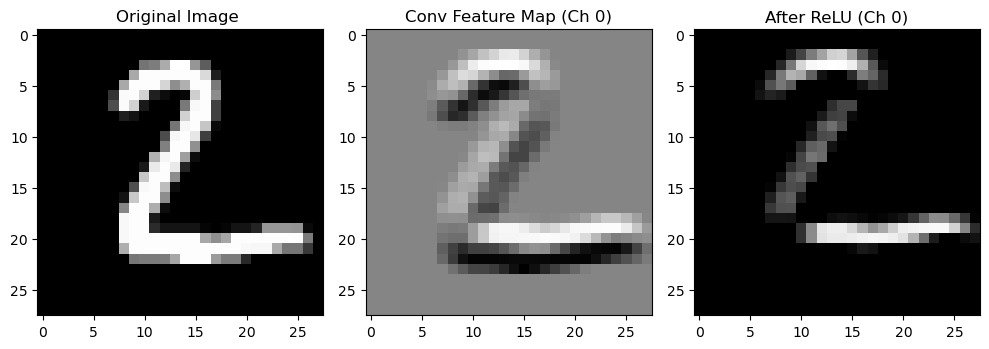

In [33]:
# Take one test image
img = test_images[1:2]  # Batch of 1

# Correct Layer Indexing based on model.summary():
# model.layers[0] -> Conv2D
# model.layers[1] -> ReLU
conv_layer = model.layers[0]
relu_layer = model.layers[1]

# Define the extraction model
# FIX: Use 'conv_layer.input' instead of 'model.input' to avoid AttributeError
activation_model = models.Model(
    inputs=conv_layer.input,
    outputs=[conv_layer.output, relu_layer.output]
)

# Get predictions
conv_output, relu_output = activation_model.predict(img)

# --- Plotting ---

plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 3, 1)
plt.title('Original Image ')
plt.imshow(img[0].squeeze(), cmap='gray')

# Plot one feature map from conv (Channel 0)
plt.subplot(1, 3, 2)
plt.title('Conv Feature Map (Ch 0)')
# Use correct variable obtained from the fixed model
plt.imshow(conv_output[0, :, :, 0], cmap='gray')

# Plot after ReLU (Channel 0)
plt.subplot(1, 3, 3)
plt.title('After ReLU (Ch 0)')
plt.imshow(relu_output[0, :, :, 0], cmap='gray')

plt.tight_layout()
plt.show()